# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000

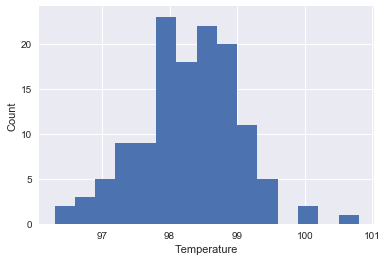

In [892]:
# Your work here.
_ = plt.hist(df['temperature'], bins = 15)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

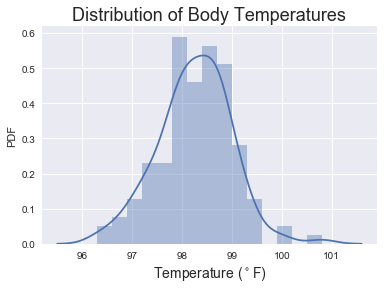

In [893]:
# While there are some outliers, the distribution of human body temperature appears to be normal.
sns.set()
sns.distplot(df.temperature, bins = 15)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Display the plot:
plt.show()

In [894]:
# Define a function to create CDF
def CDF(data):
    ''' unpack into two variables for computing CDF,'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) /n
    return x, y

In [895]:
# Compute mean and standard deviation and save variables
n = len(df['temperature'])
M = np.mean(df.temperature)
s = np.std(df.temperature)
print('n = ',n,'\nM = ',M,'\ns = ',s)

n =  130 
M =  98.24923076923078 
s =  0.7303577789050377


In [896]:
# Seed the random number generator
np.random.seed(42)
# Simulate a random sample with same statistics and size 10000
normal = np.random.normal(M,s,10000)
normal

array([ 98.61200981,  98.14824836,  98.72227513, ...,  97.73409721,
        98.61131701,  98.71986489])

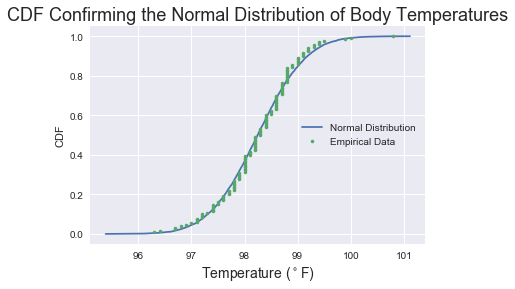

In [897]:
#CReate CDFs
x_temp, y_temp = CDF(df.temperature)
x_normal, y_normal = CDF(normal)
# plot both CDFs
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=18)

plt.show()

In [898]:
'''
Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
'''
# Print the body temperature sample size:
print('Sample Size:', n)
# Size is 130 which is greater than 30 and hence can be cosnidered large enough. The observations are independent and distinct 

Sample Size: 130



Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?
It is best to use a one-sample test since one set of data is compared to a single value. For this situation, it is 
best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small 
samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

Null Hypothesis: The true population mean is equal to the conventional mean (98.6∘∘F).

H0:μ−98.6=0
Significance Level: 99.9% Confidence
α=0.01




In [900]:
# Save the results of a one sample t test
t = stats.ttest_1samp(df.temperature,98.6)[0]
p = stats.ttest_1samp(df.temperature,98.6)[1]
print(' t statistic:',t )
print(' p statistic:',p )

 t statistic: -5.45482329236
 p statistic: 2.41063204156e-07


In [901]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.36754645418 3.36754645418


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level and the p-value is certainly below the significance level of 0.01, so the null hypothesis can be rejected.

First, a look at a few more tests. The z-test is not the most appropriate since the population standard deviation is not known; however, it can be approximated using the standard error of the mean:

In [902]:
#Calculate standard error of the mean
sem = s/np.sqrt(n)

In [903]:
# Calculate and save z statistic:
z = (M-98.6)/sem
# Calculate and save p value
p = stats.norm.cdf(z)*2
# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.47592520208
p-value: 4.35231516588e-08


As expected, the z-statistic is very close to the t-statistic and the p-value is also very low.

Another test method is to generate many sets of simulated data assuming the null hypothesis is true, then compute the test statistic for each simulated dataset:

In [904]:
#Define bootstrap functions
def replicate(data,function):
    ''' Return replicate of resampled data array '''
    # Create the resampled array and return the statistic of interest
    return function(np.random.choice(data, size = len(data)))

def draw_replicates(data,function, size=1):
    ''' Draw bootstrap replicates'''
    # Initialize array of replicates
    replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        replicates[i] = replicate(data,function)
    return replicates

In [905]:
# Seed the random number generator
np.random.seed(42)

# Make an array of translated temperatures
translated_temps = df.temperature - M + 98.6

# Draw bootstrap replicates of translated temperatures
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of repllicates that are less than the observed mean temperature 
p = np.sum(translated_replicates <= M)/len(translated_replicates)

# print the p value
print("p-value:", p)

p-value: 0.0


In every test the p value is significantly less than 0.01 and hence null hypothesis is rejected.
So, we reject the claim that true population mean is the conventional human body temperature of 98.6F

Draw a Sample of Size 10 from the Data and Repeat Both Tests
Which one is the correct one to use?
What is noticeable? What does this say about the difference in application of the t and z statistic?
This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.

In [906]:
# Seed the random number generator
np.random.seed(42)
# Draw a random sample of 10 from the temperature data
sample = np.random.choice(df.temperature, size = 10)
sample

array([ 98. ,  98.8,  97.8,  97. ,  97.7,  98.3,  98. ,  97.9,  99. ,  98. ])

In [907]:
t = stats.ttest_1samp(sample,98.6)[0]
p = stats.ttest_1samp(sample,98.6)[1]
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -3.09344792023
p-value: 0.0128577046048


In [908]:
# Calculate and save the Z statistic
z = (np.mean(sample) - 98.6)/(np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p value
p = stats.norm.cdf(z)*2

print('z-statistic:', z)
print('p-value:', p)

z-statistic: -3.26078041701
p-value: 0.0011110604539


In [909]:
# Print the quantiles of the t distribution with 95% confidence interval
print(stats.t.ppf(q = 0.025, df = 10-1),stats.t.ppf(q = 0.975, df= 10 -1))

-2.26215716274 2.26215716274


In [910]:
# Print the quantiles of the t distribution with 99% confidence interval
print(stats.t.ppf(q = 0.005, df = 10-1),stats.t.ppf(q = 0.995, df= 10 -1))

-3.24983554402 3.24983554402


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.

At what value is one's temperature considered 'abnormal'?
The null hypothesis was rejected with a 99.9% confidence interval, but analysis of abnormal values at different levels may be helpful.

In [911]:
# Calculate and save the 95% prediction interval:
PI = stats.norm.interval(0.95, loc=M, scale=s)
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81775582674824, 99.680705711713316)


Temperatures below 96.81F and above 99.68F will be considered abnormal

Is There a Significant Difference Between Males and Females in Normal Temperature?

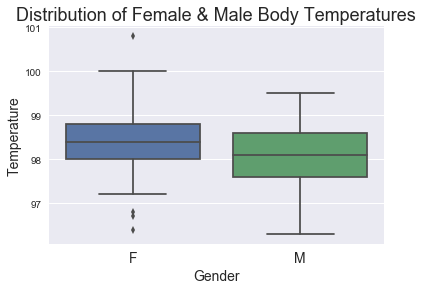

In [912]:
# Create boxplot of temperatures for gender
_ = sns.boxplot(x = 'gender', y = 'temperature', data = df)
plt.tick_params(axis = 'x', which = 'major', labelsize = 14)
_ = plt.xlabel('Gender', fontsize = 14)
_ = plt.ylabel('Temperature', fontsize = 14)
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [913]:
# Check temperatures by gender
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']
# sample sizes
n_female = len(female_temp)
n_male = len(male_temp)
#Sample means
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)
#Print sample size and mean
print('Female sample size: ',n_female, '\nFemale sample mean: ', M_female)
print('\nMale sample size: ',n_female, '\nMale sample mean: ', M_male)

Female sample size:  65 
Female sample mean:  98.39384615384613

Male sample size:  65 
Male sample mean:  98.1046153846154


There is a difference between the mean temperatures of females and males in the sample data, but a statistical analysis will help determine if the difference is significant.

Null Hypothesis: There is no significant difference between female and male normal human body temperature.

H0:μfemales−μmales=0
Significance Level: 95% Confidence

α=0.05

In [914]:
# Define permutation functions
def permutation_sample(data1,data2):
    ''' Return a permutation sample from two datasets'''
    # Concatenate the datasets
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample1 = permuted_data[:len(data1)]
    permutation_sample2 = permuted_data[len(data1):]
    return permutation_sample1, permutation_sample2

def draw_permutation_replicates(data1,data2,func,size=1):
    ''' Draw multiple permutation replicates'''
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample1, permutation_sample2 = permutation_sample(data1, data2)
        
        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample1, permutation_sample2)
        
    return permutation_replicates

def difference_of_means(data1,data2):
    ''' Return the difference of two means'''
    return np.mean(data1) - np.mean(data2)


In [915]:
# Seed the random number
np.random.seed(42)
#Compute difference of means
empirical_difference = difference_of_means(female_temp, male_temp)

# Draw 10000 permutation replicates
permutation_replicates = draw_permutation_replicates(female_temp, male_temp, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means
p = np.sum(permutation_replicates >= empirical_difference)/len(permutation_replicates)

#Print
print('Difference of Means', empirical_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.0119


With a p-value of 0.0119, the null hypothesis is rejected;

In [916]:
# Conduct a two sample t test
t = stats.ttest_ind(female_temp,male_temp)[0]
p = stats.ttest_ind(female_temp,male_temp)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 2.28543453817
p-value: 0.0239318831224


In [917]:
# print the quantiles of t distribution for corresponding confidence interval and degree of freedom
print((stats.t.ppf(q = 0.025, df = 65-1)),(stats.t.ppf(q = .975, df= 65-1)))

-1.99772965363 1.99772965363


Two sample t test returned t statistic of 2.29 and p value of 0.024; So, null hypothesis is again rejected.
Females, though, have a slightly higher temperature than males.

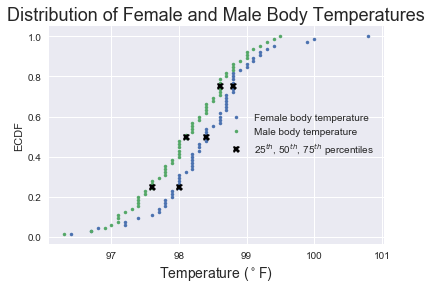

In [918]:
#Compute percentiles
percentile = np.array([25,50,75])
f_percentile = np.percentile(df.temperature[df.gender == 'F'],percentile)
m_percentile = np.percentile(df.temperature[df.gender == 'M'],percentile)
# Compute ECDFs
fx_temp, fy_temp = CDF(df.temperature[df.gender == 'F'])
mx_temp, my_temp = CDF(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot
_ = plt.plot(fx_temp, fy_temp, marker = '.', linestyle = 'none' )
_ = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# plot the percentiles
_ = plt.plot(f_percentile, percentile/100, marker = 'X', linestyle = 'none', color = 'black')
_ = plt.plot(m_percentile, percentile/100, marker = 'X', linestyle = 'none', color = 'black')

# Label axes, add legend, add title
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize = 14)
_ = plt.ylabel( 'ECDF')
_ = plt.legend(('Female body temperature', 'Male body temperature', '25$^{th}$, 50$^{th}$, 75$^{th}$ percentiles'), loc = 'center right')
_ = plt.title('Distribution of Female and Male Body Temperatures', fontsize=18)
plt.show()

Is There a Relationship Between Heart Rate and Body Temperature?
A graphical data analysis will be performed before statistical analysis.

First, a look at whether the distribution of heart rate is normal:

In [919]:
# Find sample size
n =  len(df.heart_rate)
# Sample mean
M = np.mean(df.heart_rate)
# Sample standard deviation
s = np.std(df.heart_rate)
# Print
print('Sample size: ', n, '\nSample Mean: ', M, '\nSample standard deviation: ', s)

Sample size:  130 
Sample Mean:  73.76153846153846 
Sample standard deviation:  7.034862467797676


In [920]:
# Seed the random number generator
np.random.seed(42)
# Simulate a random sample with same distribution and size 10,000
normal = np.random.normal(M,s,10000)
normal

array([ 77.25585421,  72.78886812,  78.31793825, ...,  68.79973231,
        77.24918108,  78.29472261])

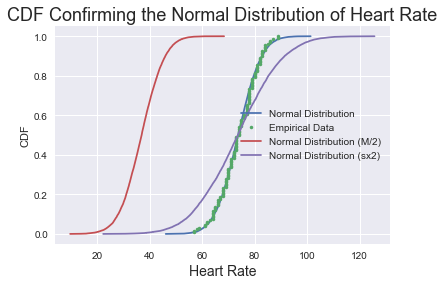

In [921]:
# Compute CDFs
x_normal,y_normal = CDF(normal)
x_hr,y_hr = CDF(df.heart_rate)
# plot both cdfs in the same plot
_ = plt.plot(x_normal,y_normal)
_ = plt.plot(x_hr,y_hr, marker = '.', linestyle = 'none' )

# Generate data to demonstrate optimal parameters
# Take sample with half the mean
sample_half = np.random.normal(M/2, s,10000)
# Take sample with double standard deviation
sample_double = np.random.normal(M,s*2,10000)

x_half, y_half = CDF(sample_half)
x_double, y_double = CDF(sample_double)

# Plot CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Label axes and add legend and a title:
_ = plt.xlabel('Heart Rate', fontsize=14)
_ = plt.ylabel('CDF')
_ = plt.legend(('Normal Distribution', 'Empirical Data', 'Normal Distribution (M/2)', 'Normal Distribution (sx2)'), loc='center right')
_ = plt.title('CDF Confirming the Normal Distribution of Heart Rate', fontsize=18)


# Display the plots:
plt.show()

Aside from confirming that the distribution of heart rate is normal, the graph demonstrates that the sample mean parameter is optimal in that it best reproduces the data.

Now we will do a graphical analysis of the relationship between heart rate and temperature:

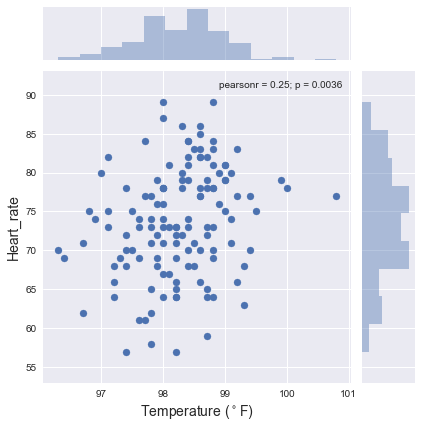

In [922]:
# Create a figure of joint plot of temperature and heart rate
fig = sns.jointplot(df.temperature,df.heart_rate)
# Add room around the margins
plt.margins(0.125)
# Label axes and add title
fig.set_axis_labels('Temperature ($^\circ$F)', 'Heart_rate', fontsize = 14)
plt.show()

The graph function returned a correlation of 0.25 (p=0.0036), but to demonstrate how, we need a simulation of the hypothesis that temperature and heart rate are not related to each other:

In [923]:
def pearson_r(x,y):
    ''' Compute pearson correlation coefficient between the two arrays'''
    # Compute correlation matrix
    correlation_matrix = np.corrcoef(x,y)
    # Return entry [0,1]
    return correlation_matrix[0,1]

    

In [924]:
# Seed the random number generator
np.random.seed(42)

# Compute and save empirical correlation
r = pearson_r(df.temperature, df.heart_rate)

permutation_replicates = np.empty(10000)

#Draw reolicates
for i in range(len(permutation_replicates)):
    temperature_permuted = np.random.permutation(df.temperature)
    # Compute pearson correlation
    permutation_replicates[i] = pearson_r(temperature_permuted, df.heart_rate)
    
# Calculate p value
p = np.sum(permutation_replicates >= r)/len(permutation_replicates)
# Print the results:
print('Correlation:', r)
print('p-value =', p)

Correlation: 0.253656402721
p-value = 0.0016


Both p values call for rejection of null hypothesis.That means temperature and heart rate are dependent on each other.
They are positively correlated with r = 0.25
Let's do a regression analysis

In [925]:
# Perform linear regression
a, b = np.polyfit(df.temperature, df.heart_rate, 1)
# Print slope and intercept
print('Slope: ', a, 'Intercept: ',b)


Slope:  2.44323803861 Intercept:  -166.284719418


Linear regression resulted in slope of 2.44 and intercept of -166.29; so
HR=2.44×∘F−166.3

In [926]:
# Generate theoretical data with the same slope and intercept
x = np.array([df.temperature.min() -1, df.temperature.max() +1])
y = a*x + b

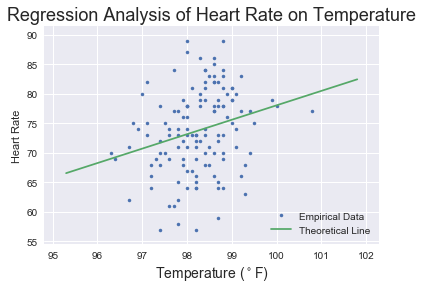

In [927]:
# Plot the empirical data and theoretical linear regression
_ = plt.plot(df.temperature, df.heart_rate, marker = '.', linestyle = 'none')
_ = plt.plot(x,y)
# Add margins
plt.margins(0.075)
# Label axes, add legend, add title
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize = 14)
_ = plt.ylabel('Heart Rate')
_ = plt.legend(('Empirical Data', 'Theoretical Line'), loc='lower right')
fig = plt.title('Regression Analysis of Heart Rate on Temperature', fontsize=18)

# Display the plots:
plt.show()

Finally, what is the variabiity in regression analysis

In [928]:
def draw_linear_regression(x, y, size = 1):
    ''' Draw bootstrap replocates for linear regression'''
    indices = np.arange(len(x))
    # Initialize arrays of slope and intercept replicates
    slope_replicates = np.empty(size)
    intercept_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bootstrap_indices = np.random.choice(indices, size=len(indices))
        bootstrap_x, bootstrap_y = x[bootstrap_indices], y[bootstrap_indices]
        slope_replicates[i], intercept_replicates[i] = np.polyfit(bootstrap_x, bootstrap_y, 1)
    return slope_replicates,intercept_replicates
        

In [929]:
# Seed the random number generator
np.random.seed(42)
# Generate replicates of slope and intercept
a,b = draw_linear_regression(df.temperature,df.heart_rate,size=1000)


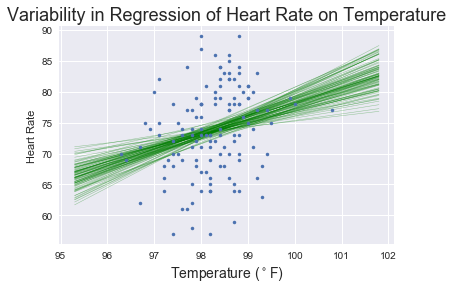

In [931]:
# Generate an arra of x values
x = np.array([df.temperature.min()-1, df.temperature.max()+1])
# Plot Bootstrap lines
for i in range(100):
    y = a[i]*x + b[i]
    _ = plt.plot(x,y,linewidth = 0.5,alpha=0.2, color='green')
    
# Plot the data
_ = plt.plot(df.temperature,df.heart_rate,marker = '.',linestyle = 'none')
# Label axes, add legen, add title
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize = 14)
_ = plt.ylabel('Heart Rate')
_ = plt.title('Variability in Regression of Heart Rate on Temperature', fontsize=18)

# Save and display the plots:
#plt.savefig('reports/figures/regression_heartrate_temperature.png')
plt.show()
